In [2]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Define the path to your dataset in Google Drive
dataset_path = '/content/drive/MyDrive/short_data/DATASET'

# Function to extract features (Mel Spectrogram) and assign labels
def extract_features_and_labels(dataset_path, max_length=500):
    features = []
    labels = []

    # Iterate over the dataset folders (Bonafide, Spoofed_TTS, Spoofed_Tacotron)
    for category in ['Bonafide', 'Spoofed_TTS', 'Spoofed_Tacotron']:
        category_path = os.path.join(dataset_path, category)

        for speaker_folder in os.listdir(category_path):
            speaker_path = os.path.join(category_path, speaker_folder)

            # Handle Bonafide folder with Part1 and Part2 subfolders
            if category == 'Bonafide':
                for part in ['Part 1', 'Part 2']:
                    part_path = os.path.join(speaker_path, part)
                    for file in tqdm(os.listdir(part_path), desc=f"Processing {category}/{speaker_folder}/{part}"):
                        file_path = os.path.join(part_path, file)
                        try:
                            # Load audio
                            audio, sr = librosa.load(file_path, sr=16000)
                            # Extract Mel Spectrogram features
                            mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40, fmax=8000)
                            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
                            # Pad or trim the feature array to a fixed length
                            if mel_spec_db.shape[1] < max_length:
                                mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_length - mel_spec_db.shape[1])), mode='constant')
                            else:
                                mel_spec_db = mel_spec_db[:, :max_length]
                            features.append(mel_spec_db)
                            # Label: 0 for real (Bonafide)
                            labels.append(0)
                        except Exception as e:
                            print(f"Error processing {file_path}: {e}")
                            continue
            else:
                # Handle Spoofed_TTS and Spoofed_Tacotron folders
                for file in tqdm(os.listdir(speaker_path), desc=f"Processing {category}/{speaker_folder}"):
                    file_path = os.path.join(speaker_path, file)
                    try:
                        # Load audio
                        audio, sr = librosa.load(file_path, sr=16000)
                        # Extract Mel Spectrogram features
                        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40, fmax=8000)
                        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
                        # Pad or trim the feature array to a fixed length
                        if mel_spec_db.shape[1] < max_length:
                            mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_length - mel_spec_db.shape[1])), mode='constant')
                        else:
                            mel_spec_db = mel_spec_db[:, :max_length]
                        features.append(mel_spec_db)
                        # Label: 1 for fake (Spoofed_TTS, Spoofed_Tacotron)
                        labels.append(1)
                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")
                        continue

    return np.array(features), np.array(labels)

# Extract features and labels
x, y = extract_features_and_labels(dataset_path)

# Print the shape of data
print(f"Shape of features: {x.shape}")
print(f"Shape of labels: {y.shape}")

Processing Spoofed_Tacotron/Speaker_03: 100%|██████████| 100/100 [00:13<00:00,  7.20it/s]


Shape of features: (5995, 40, 500)
Shape of labels: (5995,)


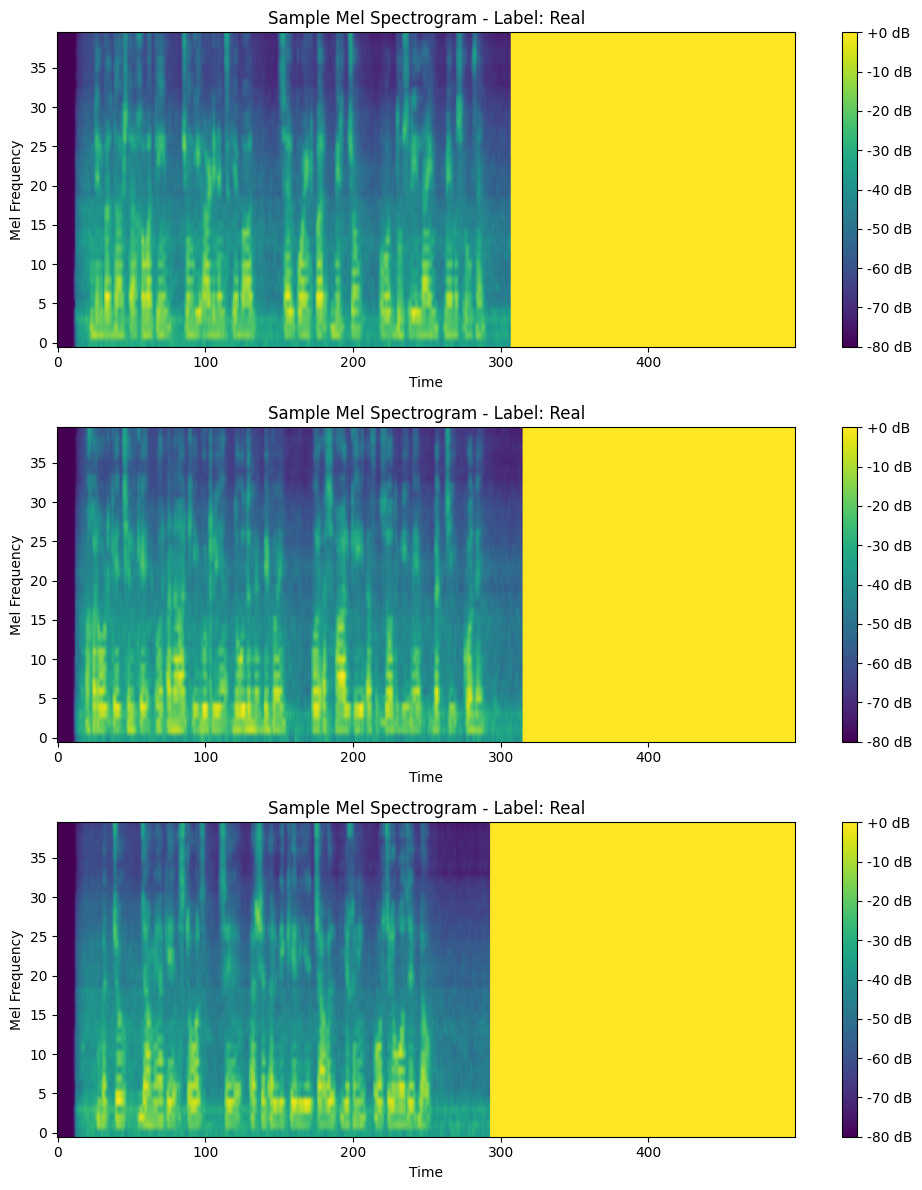

In [ ]:
# Display some sample Mel spectrograms
num_samples_to_show = 3  # Number of spectrograms to display
plt.figure(figsize=(10, 4 * num_samples_to_show))
for i in range(num_samples_to_show):
    plt.subplot(num_samples_to_show, 1, i + 1)
    plt.imshow(x[i], aspect='auto', origin='lower')
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Sample Mel Spectrogram - Label: {'Real' if y[i] == 0 else 'Fake'}")
    plt.xlabel("Time")
    plt.ylabel("Mel Frequency")
plt.tight_layout()
plt.show()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

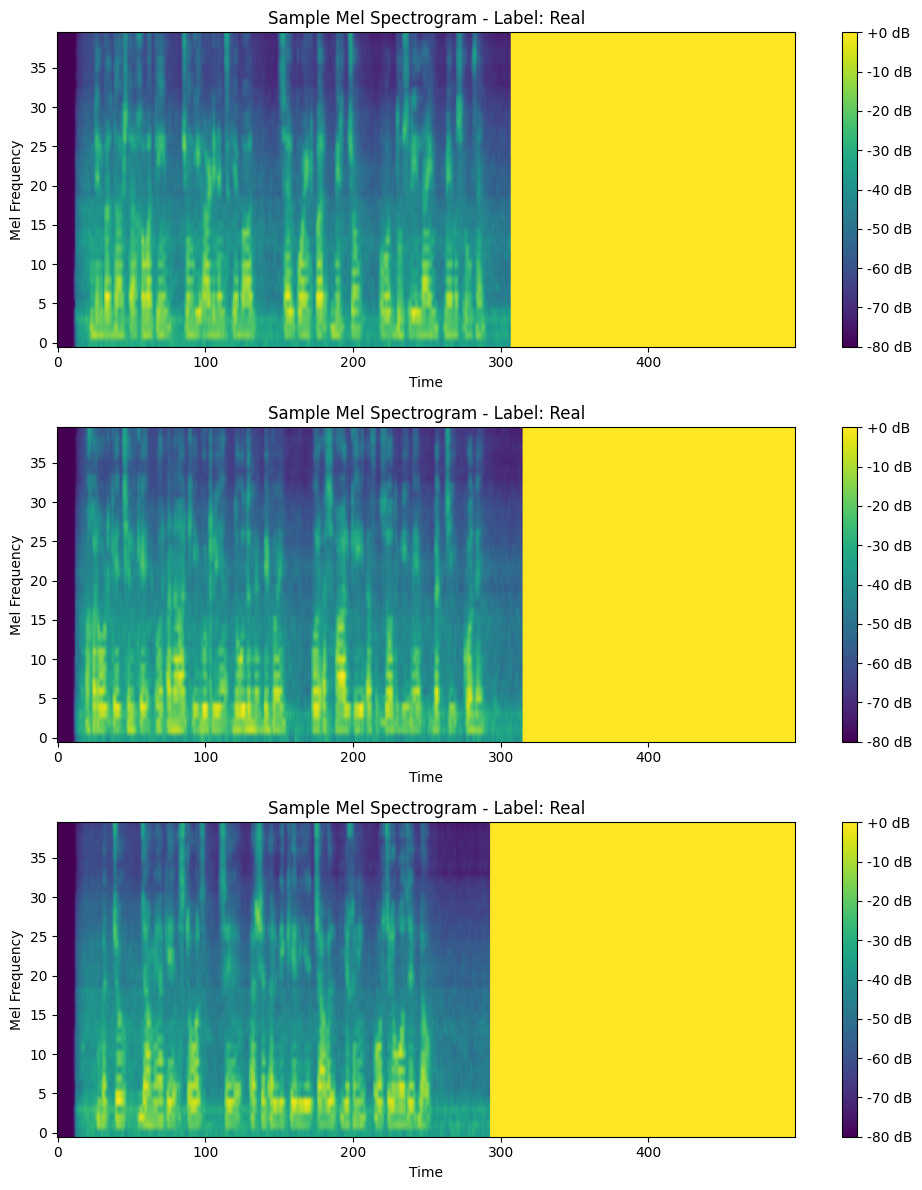

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5956 - loss: 5.2953 - val_accuracy: 0.6650 - val_loss: 0.6073
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6836 - loss: 0.5907 - val_accuracy: 0.6800 - val_loss: 0.6012
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6951 - loss: 0.5738 - val_accuracy: 0.7217 - val_loss: 0.5488
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7465 - loss: 0.5096 - val_accuracy: 0.7833 - val_loss: 0.4770
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7952 - loss: 0.4466 - val_accuracy: 0.8300 - val_loss: 0.3851
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8388 - loss: 0.3683 - val_accuracy: 0.4817 - val_loss: 8.3014
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8109 - loss: 0.6412 - val_accuracy: 0.7617 - val_loss: 0.4534
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8706 - loss: 0.3243 - val_ac

In [ ]:



# Display some sample Mel spectrograms
num_samples_to_show = 3  # Number of spectrograms to display
plt.figure(figsize=(10, 4 * num_samples_to_show))
for i in range(num_samples_to_show):
    plt.subplot(num_samples_to_show, 1, i + 1)
    plt.imshow(x[i], aspect='auto', origin='lower')
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Sample Mel Spectrogram - Label: {'Real' if y[i] == 0 else 'Fake'}")
    plt.xlabel("Time")
    plt.ylabel("Mel Frequency")
plt.tight_layout()
plt.show()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Define the CNN model
model = Sequential([
    Reshape((40, 500, 1), input_shape=(40, 500)),  # Reshape input to add channel dimension
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (real vs fake)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


In [ ]:
# Specify the path to save the model in Google Drive
model_save_path = '/content/drive/MyDrive/cnn_melspecs_model.h5'

# Save the model
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /content/drive/MyDrive/cnn_melspecs_model.h5


In [3]:
from google.colab import files

# Upload audio file
uploaded = files.upload()

# Get the uploaded file name
audio_file_path = list(uploaded.keys())[0]

print(f"Uploaded file: {audio_file_path}")

from tensorflow.keras.models import load_model

# Path to the saved model in Google Drive
model_path = '/content/drive/MyDrive/cnn_melspecs_model.h5'

# Load the trained model
model = load_model(model_path)

print("Model loaded successfully!")



Saving 12.wav to 12.wav
Uploaded file: 12.wav


Model loaded successfully!


In [4]:
import librosa
import numpy as np

def preprocess_audio(file_path, max_length=500):
    try:
        # Load audio
        audio, sr = librosa.load(file_path, sr=16000)
        # Extract Mel Spectrogram features
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40, fmax=8000)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Pad or trim the Mel spectrogram to match training input shape
        if mel_spec_db.shape[1] < max_length:
            mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, max_length - mel_spec_db.shape[1])), mode='constant')
        else:
            mel_spec_db = mel_spec_db[:, :max_length]

        # Reshape for model input (add batch dimension)
        mel_spec_db = np.expand_dims(mel_spec_db, axis=0)  # Add batch dimension
        mel_spec_db = np.expand_dims(mel_spec_db, axis=-1)  # Add channel dimension

        return mel_spec_db
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None



# Preprocess the uploaded audio file
input_data = preprocess_audio(audio_file_path)

# Ensure preprocessing was successful
if input_data is not None:
    # Get model prediction
    prediction = model.predict(input_data)

    # Convert prediction to label
    predicted_label = "Bonafide (Real)" if prediction[0][0] < 0.5 else "Spoofed (Fake)"

    print(f"Predicted Label: {predicted_label}")
else:
    print("Failed to preprocess audio.")



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label: Spoofed (Fake)


In [ ]:
# Preprocess the uploaded audio file
input_data = preprocess_audio(audio_file_path)

# Ensure preprocessing was successful
if input_data is not None:
    # Get model prediction
    prediction = model.predict(input_data)

    # Convert prediction to label
    predicted_label = "Bonafide (Real)" if prediction[0][0] < 0.5 else "Spoofed (Fake)"

    print(f"Predicted Label: {predicted_label}")
else:
    print("Failed to preprocess audio.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
Predicted Label: Bonafide (Real)
